# Sentiment Analysis On IMDB Dataset

The goal of this project is to perform sentiment analysis on the IMDB dataset. Sentiment analysis is a natural language processing (NLP) technique that aims to determine the sentiment or opinion expressed in a given text. In this case, we will analyze movie reviews from the IMDB dataset and classify them as positive or negative based on the sentiment they convey.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset from Keras-datasets

In [3]:
from tensorflow.keras.datasets import imdb

# Splitting Dataset

Splitting a dataset refers to the process of dividing a given dataset into two or more subsets for training and evaluation purposes. The most common type of split is between the training set and the testing (or validation) set. This division allows us to assess the performance of a machine learning model on unseen data and evaluate its generalization capabilities.

In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [7]:
class_names = ['Negative', 'Positive']

In [8]:
word_index = imdb.get_word_index()


1641221/1641221 [==============================] - 1s 1us/step


# Decoding The Reviews

Decoding is process of generating human-readable output from a model's predictions or representations. It involves converting the model's internal representations, which are often in a numerical or encoded form, into a more understandable format such as text or structured data.

In [9]:
reverse_word_index = dict((value, key) for key, value in word_index.items())

def decode(review):
    text = ''
    for i in review:
        text += reverse_word_index[i]
        text += ' '
    return text

In [10]:
def show_lengths():
    print('Length of 1st training example: ', len(x_train[0]))
    print('Length of 2nd training example: ',  len(x_train[1]))
    print('Length of 1st test example: ', len(x_test[0]))
    print('Length of 2nd test example: ',  len(x_test[1]))
    
show_lengths()

Length of 1st training example:  218
Length of 2nd training example:  189
Length of 1st test example:  68
Length of 2nd test example:  260


# Padding

Padding, in the context of natural language processing (NLP) and machine learning, refers to the process of adding additional elements to input sequences or data to make them conform to a specific length or shape.

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, value = word_index['the'], padding = 'post', maxlen = 256)
x_test = pad_sequences(x_test, value = word_index['the'], padding = 'post', maxlen = 256)

# Building Model

Creating a deep learning model involves defining the architecture and structure of the neural network, specifying the layers, and configuring the parameters for training.

In [13]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Embedding, Dense, GlobalAveragePooling1D

In [14]:
model = Sequential([
    Embedding(10000, 16),
    GlobalAveragePooling1D(),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

# Compiling Model

Compiling the model in deep learning involves configuring essential components that define how the model will be trained.

In [15]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


# Training Model

Training the model in deep learning involves the process of iteratively updating the model's parameters (weights and biases) based on the provided training data to minimize the loss function and improve the model's performance.

In [17]:
from tensorflow.python.keras.callbacks import LambdaCallback

simple_logging = LambdaCallback(on_epoch_end = lambda e, l: print(e, end='.'))

E = 20

h = model.fit(
    x_train, y_train,
    validation_split = 0.2,
    epochs = E,
    callbacks = [simple_logging],
    verbose = False
)

0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

# Accuracy Curve

An accuracy curve is a graphical representation that depicts how the accuracy of a machine learning model changes as a specific aspect of the model or training process varies. The accuracy curve is typically plotted against the varying parameter or condition to analyze its impact on the model's accuracy.

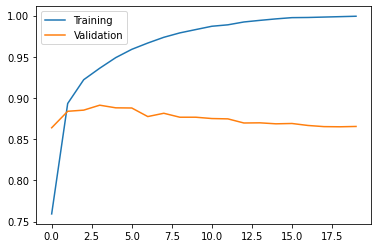

In [19]:
plt.plot(range(E), h.history['accuracy'], label = 'Training')
plt.plot(range(E), h.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.show()

# Loss Curve

A loss curve is a graphical representation that shows how the loss of a machine learning model changes over the course of training. Loss refers to the discrepancy between the predicted output of the model and the true or expected output. The loss curve helps in monitoring the progress of model training and assessing the convergence and performance of the model.

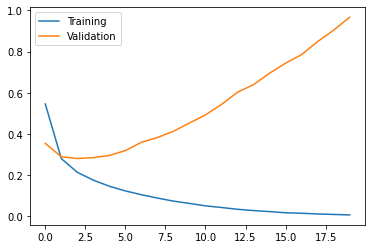

In [20]:
plt.plot(range(E), h.history['loss'], label = 'Training')
plt.plot(range(E), h.history['val_loss'], label = 'Validation')
plt.legend()
plt.show()

# Predicting On x-Test Data

In [21]:
loss, acc = model.evaluate(x_test, y_test)
print('Test set accuracy: ', acc * 100)

782/782 [==============================] - 3s 4ms/step - loss: 1.0716 - accuracy: 0.8392
Test set accuracy:  83.91600251197815


In [22]:
prediction = model.predict(np.expand_dims(x_test[0], axis = 0))
class_names = ['Negative', 'Positive']
print(class_names[np.argmax(prediction[0])])

Negative


# Thanks !